SINGLE ATOM VERLET

Median error in position 8.430705331030445 %
Median error in velocity 8.182950472423778 %


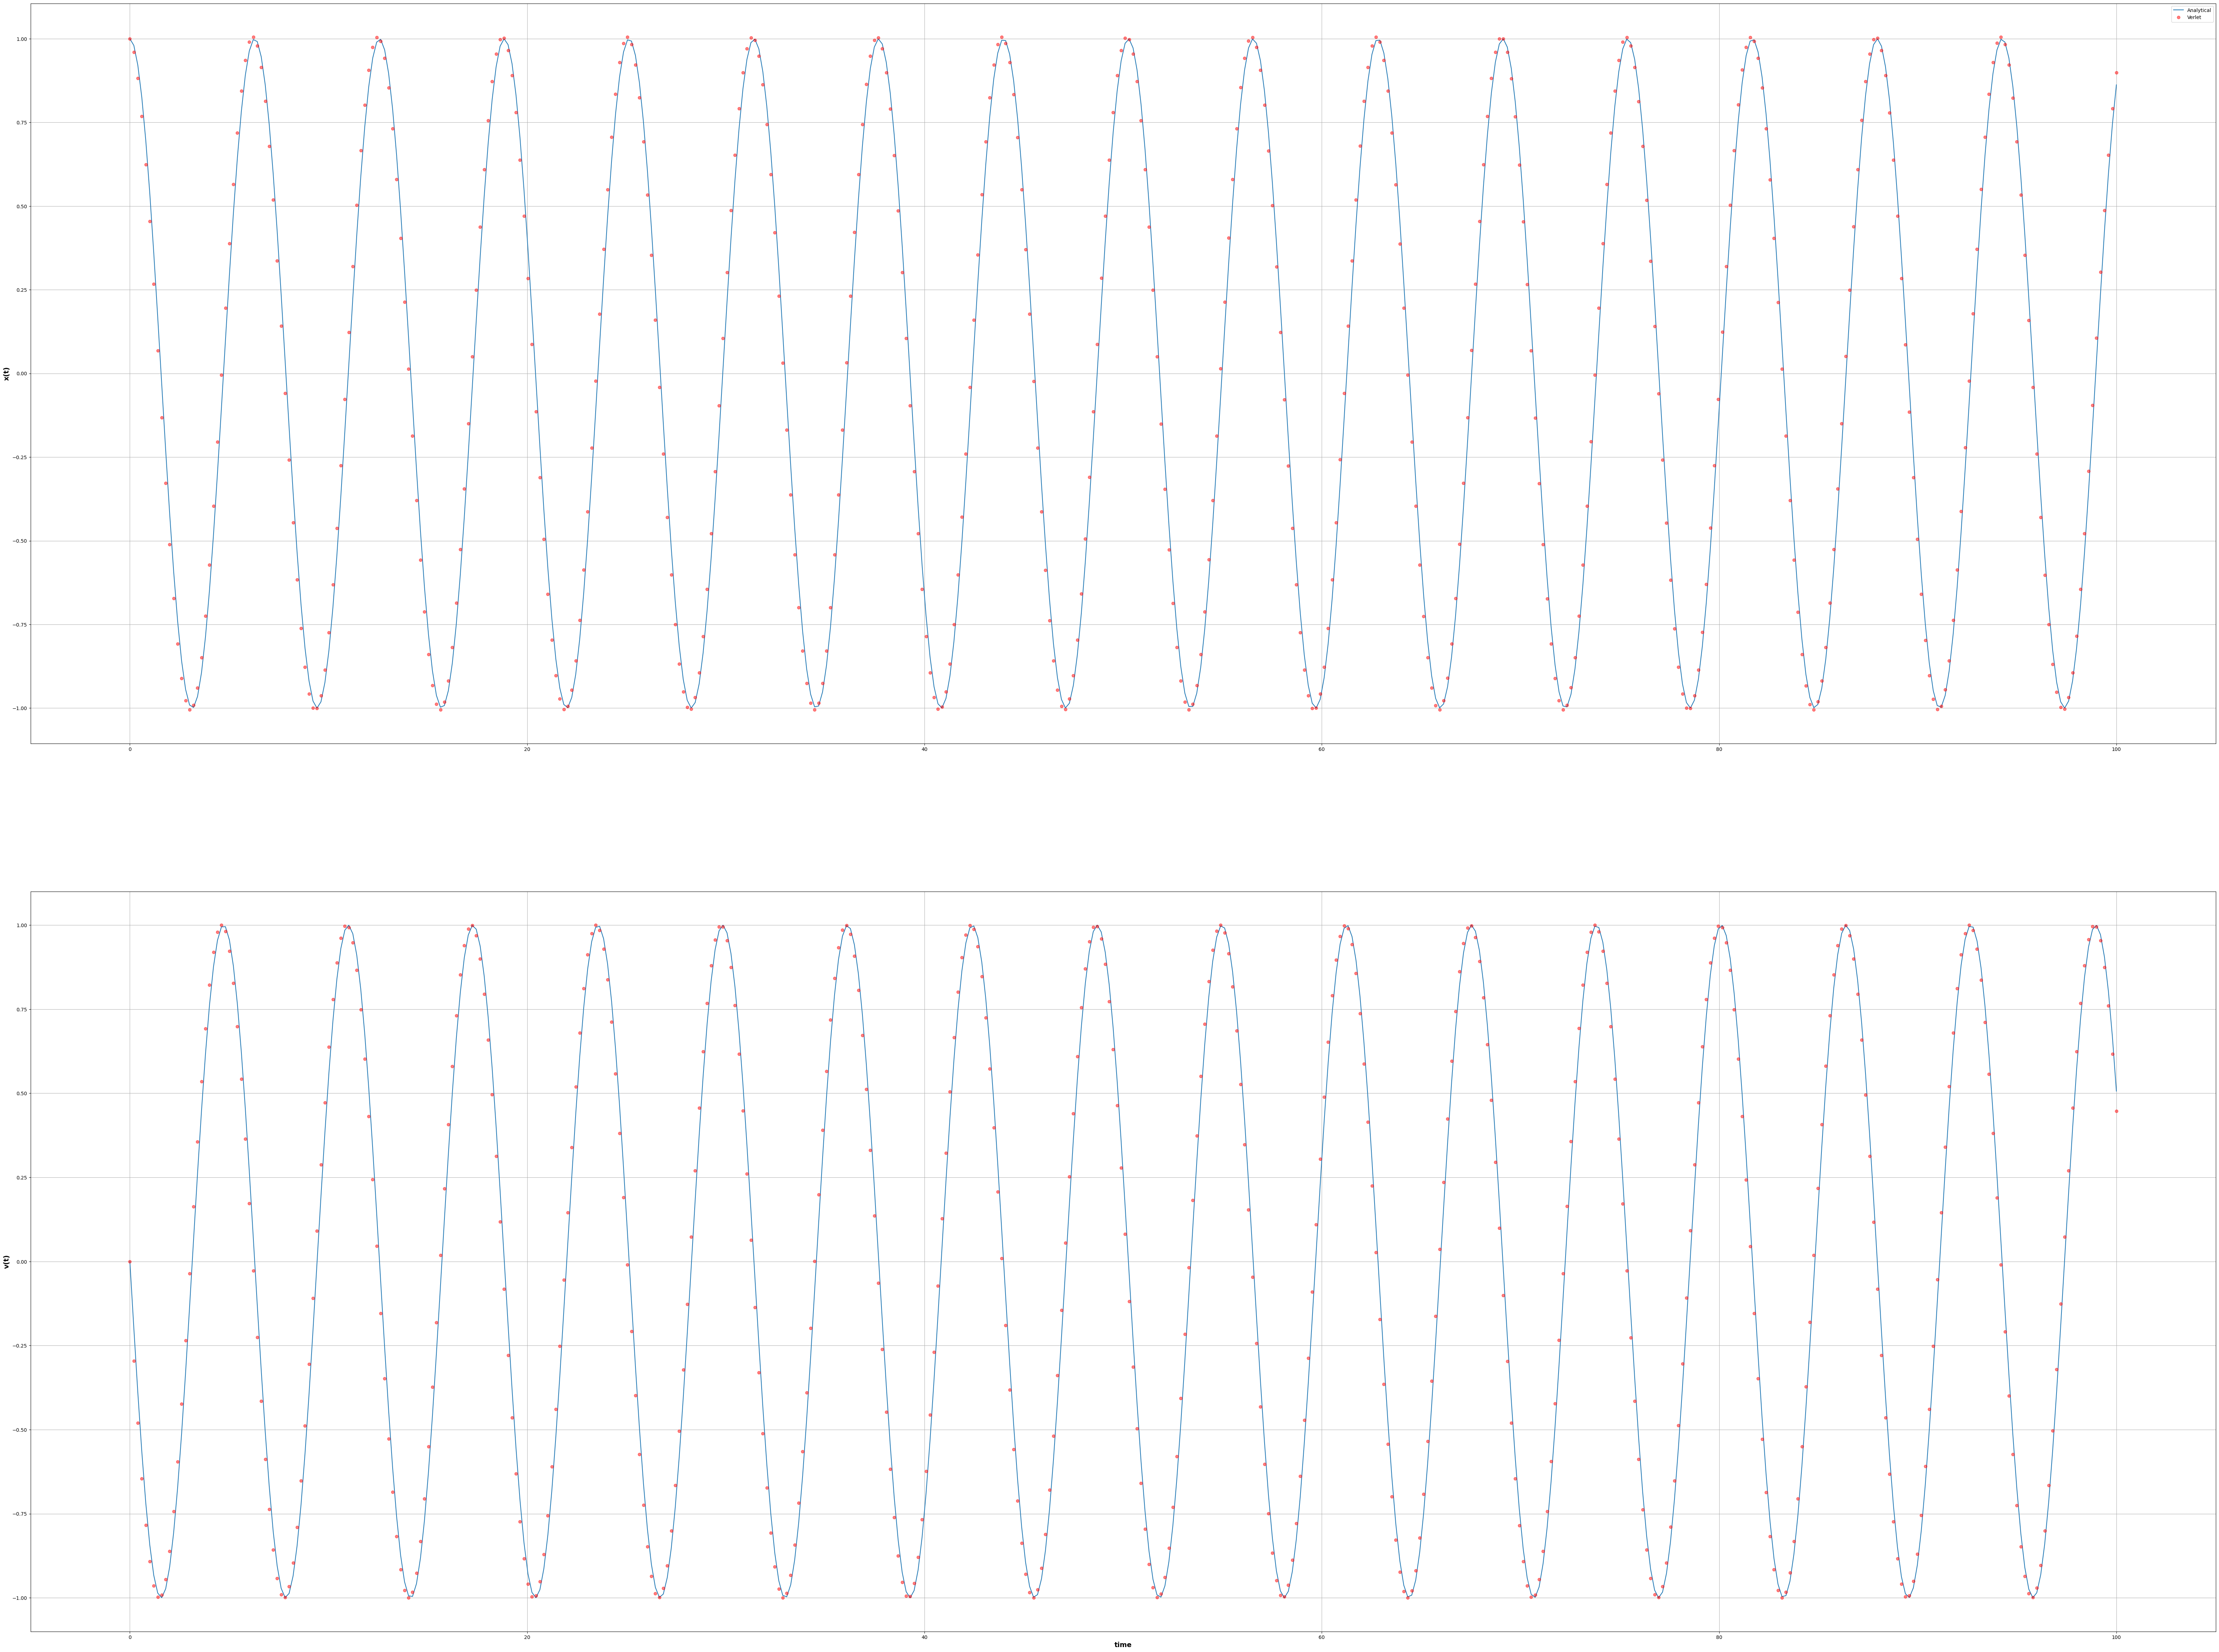

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

#%%

class MrDynamics:
    
    '''
    This object - MrDynamics will generate list of co-ordinate and velocity of a 
    particle.
    
    m is a mass of the particle.
    
    Tmax is the simulation time.
    Δt is the time step which act as a accuracy of Borish scheme.
    
    x and V are the initial position and velocity, respectively.
    
    '''
    
    def __init__(self, m, k, Tmax, Δt, x, V):
        
        # list of position, velocity, and time
        self.ListOfx = [ x ]
        self.ListOfV = [ V ]
        self.time    = []
        
        # accelaration
        self.a = lambda x, k, m : -(k/m)* x
        
        # numerical approch : Verlet
        self.Verlet(m, k, Tmax, Δt, x, V)
        
        # analytical result
        omg = (k/ m)**0.5
        self.Position = x* np.cos(omg* self.time)
        self.Velocity =-x* omg* np.sin(omg* self.time)
        
        # Error
        δx = 100* ( np.array(self.Position[1:]) - np.array(self.ListOfx[1:]) )/ np.array(self.Position[1:])
        δV = 100* ( np.array(self.Velocity[1:]) - np.array(self.ListOfV[1:]) )/ np.array(self.Velocity[1:])
        
        print( 'Median error in position ' + str(np.median( abs(δx) )) + ' %' )
        print( 'Median error in velocity ' + str(np.median( abs(δV) )) + ' %' )


    def Verlet(self, m, k, Tmax, Δt, x, V):
        
        t = 0
        
        # Step - 1 : Initialization for verlet
        xo = x
        
        V += self.a(xo, k, m)* Δt
        x1 = xo + V* Δt
        t += Δt
        
        self.ListOfx.append(x1)
        
        # Step - 2 : Verlet Algorithm
        while (t <= Tmax):
            
            x2 = 2* x1 - xo + self.a(x1, k, m)* Δt**2
            
            self.ListOfx.append(x2)
            
            xo = x1
            x1 = x2
            t += Δt
        
        # Step - 3 : Velocity
        Vel = lambda Pos, Δt : [(Pos[i+2] - Pos[i])/ (2* Δt) for i in range(0, len(Pos) - 2)]
        
        self.ListOfV = self.ListOfV + Vel( self.ListOfx, Δt )
        self.ListOfx = self.ListOfx[:-1]
        self.time    = np.linspace(0, t, len(self.ListOfx))
        
        
    def PlotTrajectory(self):
        
        fig = plt.figure( figsize = (80, 60) )
        gs = GridSpec(2, 1)
        
        ax1 = fig.add_subplot( gs[0, 0] )
        ax2 = fig.add_subplot( gs[1, 0] )
        
        ax1.plot(self.time, self.Position, label = 'Analytical')
        ax1.plot(self.time, self.ListOfx, 'ro', alpha = 0.5, label = 'Verlet')
        ax1.set_ylabel('x(t)', fontweight = 'bold', fontsize = 14)
        ax1.grid()
        ax1.legend()
        
        ax2.plot(self.time, self.Velocity)
        ax2.plot(self.time, self.ListOfV, 'ro', alpha = 0.5)
        ax2.set_xlabel('time', fontweight = 'bold', fontsize = 14)
        ax2.set_ylabel('v(t)', fontweight = 'bold', fontsize = 14)
        ax2.grid()
        
        plt.show()

#%%

if __name__ == '__main__':
    
    m, k     = 1, 1        # Mass and Spring constant
    Tmax, Δt = 100, 0.2
    x, V     = 1, 0

    Answer = MrDynamics(m, k, Tmax, Δt, x, V)
    Answer.PlotTrajectory()

SINGLE ATOM BEEMAN

Median error in position 3.6261305002797237 %
Median error in velocity 3.575367337913365 %


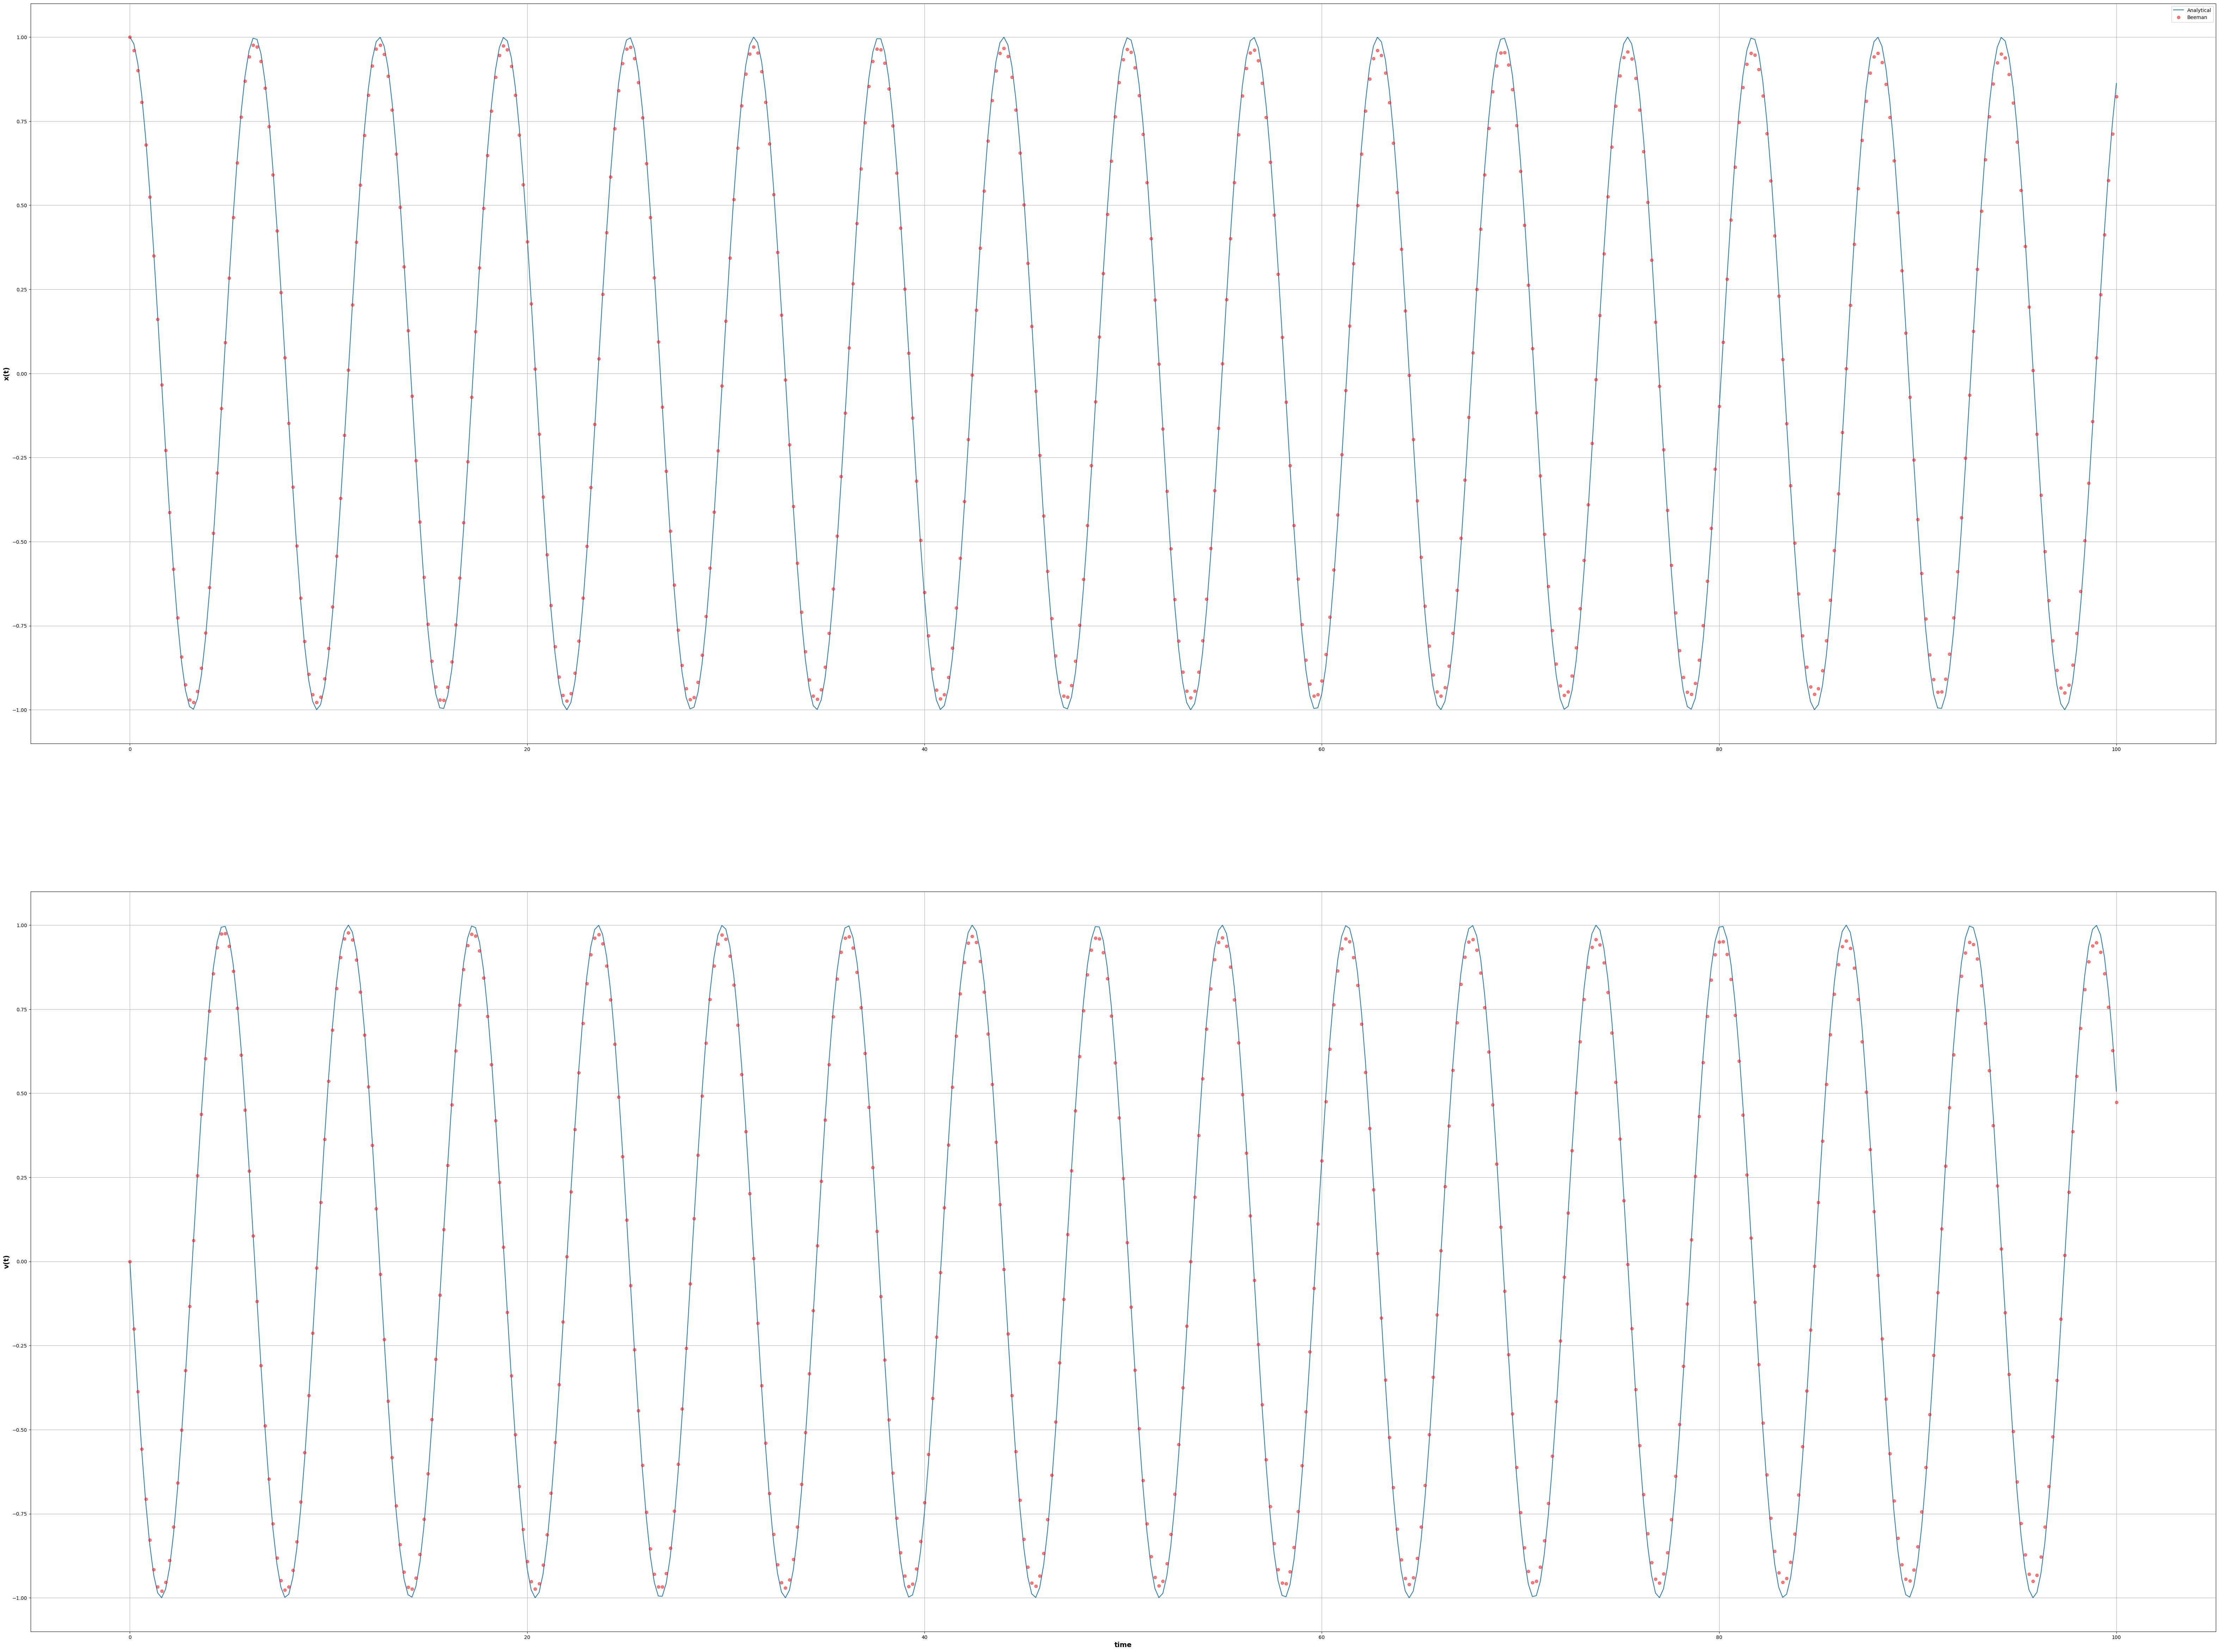

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import numpy as np
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib.gridspec import GridSpec

#%%

class MrDynamics:
    
    '''
    This object - MrDynamics will generate list of co-ordinate and velocity of a 
    particle.
    
    m is a mass of the particle.
    
    Tmax is the simulation time.
    Δt is the time step which act as a accuracy of Borish scheme.
    
    r and V are the initial position and velocity, respectively.
    
    '''
    
    def __init__(self, m, k, Tmax, Δt, x, V):
        
        # list of position, velocity, and time
        self.ListOfx = [ x ]
        self.ListOfV = [ V ]
        self.time    = []
        
        # accelaration
        self.a = lambda x, k, m : -(k/m)* x
        
        # numerical approch : Beeman
        self.Beeman(m, k, Tmax, Δt, x, V)
        
        # analytical result
        omg = (k/ m)**0.5
        self.Position = x* np.cos(omg* self.time)
        self.Velocity =-x* omg* np.sin(omg* self.time)
        
        # Error
        δx = 100* ( np.array(self.Position[1:]) - np.array(self.ListOfx[1:]) )/ np.array(self.Position[1:])
        δV = 100* ( np.array(self.Velocity[1:]) - np.array(self.ListOfV[1:]) )/ np.array(self.Velocity[1:])
        
        print( 'Median error in position ' + str(np.median( abs(δx) )) + ' %' )
        print( 'Median error in velocity ' + str(np.median( abs(δV) )) + ' %' )


    def Beeman(self, m, k, Tmax, Δt, x, V):
        
        t = 0
        
        # Step - 1 : Initialization for Beeman
        ao = self.a(x, k, m)
        
        V += ao* Δt
        x += V* Δt
        t += Δt
        
        a1 = self.a(x, k, m)
        
        self.ListOfV.append(V)
        self.ListOfx.append(x)
        
        
        # Step - 2 : Beeman Algorithm
        while (t <= Tmax):
            
            x += V* Δt + (4* a1 - ao)* Δt**2/ 6
            
            a2 = self.a(x, k, m)
            
            V += (5* a2 + 8* a1 - ao)* Δt/ 12
            
            self.ListOfV.append(V)
            self.ListOfx.append(x)
            
            ao = a1
            a1 = a2
            t += Δt
        
        self.time = np.linspace(0, t, len(self.ListOfx))
        
        
    def PlotTrajectory(self):
        
        fig = plt.figure( figsize = (80, 60) )
        gs = GridSpec(2, 1)
        
        ax1 = fig.add_subplot( gs[0, 0] )
        ax2 = fig.add_subplot( gs[1, 0] )
        
        ax1.plot(self.time, self.Position, label = 'Analytical')
        ax1.plot(self.time, self.ListOfx, 'ro', alpha = 0.5, label = 'Beeman')
        ax1.set_ylabel('x(t)', fontweight = 'bold', fontsize = 14)
        ax1.grid()
        ax1.legend()
        
        ax2.plot(self.time, self.Velocity)
        ax2.plot(self.time, self.ListOfV, 'ro', alpha = 0.5)
        ax2.set_xlabel('time', fontweight = 'bold', fontsize = 14)
        ax2.set_ylabel('v(t)', fontweight = 'bold', fontsize = 14)
        ax2.grid()
        
        plt.show()

#%%

if __name__ == '__main__':
    
    m, k     = 1, 1        # Mass and Spring constant
    Tmax, Δt = 100, 0.2
    x, V     = 1, 0

    Answer = MrDynamics(m, k, Tmax, Δt, x, V)
    Answer.PlotTrajectory()

64 ATOMS VERLET

In [2]:
import numpy as np
import pandas as pd

# Lennard-Jones parameters
epsilon = 1.0
sigma = 1.0
mass = 1.0

# Atom radius for movement constraint
atom_radius = sigma / 2
max_displacement = 0.05 * atom_radius

# Simulation parameters
delta_t = 0.2
total_time = 500
num_steps = int(total_time / delta_t)
cube_length = 10.0
num_atoms_per_edge = 4
num_atoms = num_atoms_per_edge ** 3

# Initialize positions and velocities
positions = np.linspace(0, cube_length, num_atoms_per_edge, endpoint=False)
x, y, z = np.meshgrid(positions, positions, positions, indexing='ij')
coordinates = np.vstack([x.ravel(), y.ravel(), z.ravel()]).T

velocities = np.zeros_like(coordinates)
forces = np.zeros_like(coordinates)

# Periodic boundary conditions adjustment
def periodic_adjust(vector, box_length):
    return np.remainder(vector + box_length / 2, box_length) - box_length / 2

# Lennard-Jones force and energy calculation
def calculate_forces(coords, box_length):
    n = len(coords)
    forces = np.zeros_like(coords)
    potential_energy = 0.0

    for i in range(n):
        for j in range(i + 1, n):
            displacement = periodic_adjust(coords[j] - coords[i], box_length)
            distance = np.linalg.norm(displacement)

            if distance > 0:
                inv_r6 = (sigma / distance) ** 6
                inv_r12 = inv_r6 ** 2
                force_magnitude = 24 * epsilon * (2 * inv_r12 - inv_r6) / distance
                force = force_magnitude * displacement

                forces[i] += force
                forces[j] -= force

                potential_energy += 4 * epsilon * (inv_r12 - inv_r6)

    return forces, potential_energy

# Verlet integration loop
positions_history = []
velocities_history = []
forces_history = []
energies = []

time = 0
for step in range(num_steps):
    # Save current states
    positions_history.append(coordinates.copy())
    velocities_history.append(velocities.copy())
    forces_history.append(forces.copy())

    # Update positions with displacement constraint
    new_positions = coordinates + velocities * delta_t + 0.5 * forces / mass * delta_t ** 2
    displacements = np.linalg.norm(new_positions - coordinates, axis=1)
    exceed_limit = displacements > max_displacement
    if np.any(exceed_limit):
        new_positions[exceed_limit] = (
            coordinates[exceed_limit] + 
            (new_positions[exceed_limit] - coordinates[exceed_limit]) 
            * max_displacement / displacements[exceed_limit][:, None]
        )
    new_positions = np.remainder(new_positions, cube_length)

    # Calculate new forces and potential energy
    new_forces, potential_energy = calculate_forces(new_positions, cube_length)

    # Update velocities
    new_velocities = velocities + 0.5 * (forces + new_forces) / mass * delta_t

    # Calculate kinetic energy
    kinetic_energy = 0.5 * mass * np.sum(new_velocities ** 2)

    # Save energies
    total_energy = kinetic_energy + potential_energy
    energies.append((time, kinetic_energy, potential_energy, total_energy))

    # Update system
    coordinates = new_positions
    velocities = new_velocities
    forces = new_forces

    # Print progress
    if step % 100 == 0 or step == num_steps - 1:
        print(f"Step {step}, Time {time:.2f}s, KE={kinetic_energy:.2f}, PE={potential_energy:.2f}, TE={total_energy:.2f}")

    time += delta_t

# Save results to an Excel file
df_positions = pd.DataFrame({
    "Atom": np.repeat(range(1, num_atoms + 1), len(positions_history)),
    "Time": np.tile(np.arange(0, total_time, delta_t), num_atoms),
    "X": np.concatenate([pos[:, 0] for pos in positions_history]),
    "Y": np.concatenate([pos[:, 1] for pos in positions_history]),
    "Z": np.concatenate([pos[:, 2] for pos in positions_history])
})

df_velocities = pd.DataFrame({
    "Atom": np.repeat(range(1, num_atoms + 1), len(velocities_history)),
    "Time": np.tile(np.arange(0, total_time, delta_t), num_atoms),
    "Vx": np.concatenate([vel[:, 0] for vel in velocities_history]),
    "Vy": np.concatenate([vel[:, 1] for vel in velocities_history]),
    "Vz": np.concatenate([vel[:, 2] for vel in velocities_history])
})

df_forces = pd.DataFrame({
    "Atom": np.repeat(range(1, num_atoms + 1), len(forces_history)),
    "Time": np.tile(np.arange(0, total_time, delta_t), num_atoms),
    "Fx": np.concatenate([force[:, 0] for force in forces_history]),
    "Fy": np.concatenate([force[:, 1] for force in forces_history]),
    "Fz": np.concatenate([force[:, 2] for force in forces_history])
})

df_energies = pd.DataFrame(energies, columns=["Time", "Kinetic Energy", "Potential Energy", "Total Energy"])

with pd.ExcelWriter("verlet_simulation.xlsx") as writer:
    df_positions.to_excel(writer, sheet_name="Positions", index=False)
    df_velocities.to_excel(writer, sheet_name="Velocities", index=False)
    df_forces.to_excel(writer, sheet_name="Forces", index=False)
    df_energies.to_excel(writer, sheet_name="Energies", index=False)

print("Simulation complete. Results saved to 'verlet_simulation.xlsx'.")


Step 0, Time 0.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 100, Time 20.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 200, Time 40.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 300, Time 60.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 400, Time 80.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 500, Time 100.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 600, Time 120.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 700, Time 140.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 800, Time 160.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 900, Time 180.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1000, Time 200.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1100, Time 220.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1200, Time 240.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1300, Time 260.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1400, Time 280.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1500, Time 300.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1600, Time 320.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1700, Time 340.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1800, Time 360.00s, KE=0.00, PE=-4.19, TE=-4.19
Step 1900, 

64 ATOMS VERLET WITH Mirror img, spherer exclusion

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
num_atoms = 64
box_length = 1.0  # in meters
delta_t = 0.2  # time step in seconds
total_time = 500  # total simulation time in seconds
radius_of_atom = 0.1  # hypothetical radius in meters
max_displacement = 0.05 * radius_of_atom
epsilon = 1.0  # Depth of potential well
sigma = 0.1  # Distance at which potential is zero
mass = 1.0  # in atomic mass units
num_steps = int(total_time / delta_t)

# Initialize positions, velocities, and forces
positions = np.random.rand(num_atoms, 3) * box_length
velocities = np.random.rand(num_atoms, 3) - 0.5
forces = np.zeros_like(positions)

# History for saving data
positions_history = []
velocities_history = []
forces_history = []

def compute_forces(positions, box_length):
    forces = np.zeros_like(positions)
    for i in range(num_atoms):
        for j in range(i + 1, num_atoms):
            r_vec = positions[j] - positions[i]
            r_vec -= box_length * np.round(r_vec / box_length)  # Periodic boundary
            r = np.linalg.norm(r_vec)
            if r > 0:
                f = 48 * epsilon * ((sigma / r)**12 - 0.5 * (sigma / r)**6) * (r_vec / r**2)
                forces[i] += f
                forces[j] -= f
    return forces

for step in range(num_steps):
    # Verlet integration
    if step == 0:
        new_positions = positions + velocities * delta_t + 0.5 * forces / mass * delta_t**2
    else:
        new_positions = 2 * positions - old_positions + forces / mass * delta_t**2

    # Enforce maximum displacement per time step
    displacements = new_positions - positions
    displacements -= box_length * np.round(displacements / box_length)  # Periodic boundary
    displacement_magnitudes = np.linalg.norm(displacements, axis=1)
    scaling_factors = np.minimum(1, max_displacement / displacement_magnitudes)
    displacements *= scaling_factors[:, np.newaxis]
    new_positions = positions + displacements

    # Update forces and velocities
    old_positions = positions
    positions = new_positions
    forces = compute_forces(positions, box_length)
    velocities += 0.5 * (forces / mass + forces / mass) * delta_t

    # Save history
    positions_history.append(positions.copy())
    velocities_history.append(velocities.copy())
    forces_history.append(forces.copy())

    # Energy check (optional)
    kinetic_energy = 0.5 * mass * np.sum(velocities**2)
    potential_energy = 0.5 * np.sum(np.linalg.norm(forces, axis=1) * np.linalg.norm(displacements, axis=1))
    total_energy = kinetic_energy + potential_energy

    print(f"Step {step + 1}/{num_steps}, Total Energy: {total_energy:.4f}")

# Save results to Excel
df_positions = pd.DataFrame({
    "Atom": np.repeat(range(1, num_atoms + 1), len(positions_history)),
    "Time": np.tile(np.arange(0, num_steps * delta_t, delta_t), num_atoms),
    "X": np.concatenate([pos[:, 0] for pos in positions_history]),
    "Y": np.concatenate([pos[:, 1] for pos in positions_history]),
    "Z": np.concatenate([pos[:, 2] for pos in positions_history])
})

df_velocities = pd.DataFrame({
    "Atom": np.repeat(range(1, num_atoms + 1), len(velocities_history)),
    "Time": np.tile(np.arange(0, num_steps * delta_t, delta_t), num_atoms),
    "Vx": np.concatenate([vel[:, 0] for vel in velocities_history]),
    "Vy": np.concatenate([vel[:, 1] for vel in velocities_history]),
    "Vz": np.concatenate([vel[:, 2] for vel in velocities_history])
})

df_forces = pd.DataFrame({
    "Atom": np.repeat(range(1, num_atoms + 1), len(forces_history)),
    "Time": np.tile(np.arange(0, num_steps * delta_t, delta_t), num_atoms),
    "Fx": np.concatenate([force[:, 0] for force in forces_history]),
    "Fy": np.concatenate([force[:, 1] for force in forces_history]),
    "Fz": np.concatenate([force[:, 2] for force in forces_history])
})

with pd.ExcelWriter("verlet_simulation_with_displacement_limit.xlsx") as writer:
    df_positions.to_excel(writer, sheet_name="Positions", index=False)
    df_velocities.to_excel(writer, sheet_name="Velocities", index=False)
    df_forces.to_excel(writer, sheet_name="Forces", index=False)

print("Simulation complete. Data saved to 'verlet_simulation_with_displacement_limit.xlsx'.")


Step 1/2500, Total Energy: 312328494410395.3125
Step 2/2500, Total Energy: 95798580771086064.0000
Step 3/2500, Total Energy: 116574781720271798272.0000
Step 4/2500, Total Energy: 136784776389910380544.0000
Step 5/2500, Total Energy: 150625947270667141120.0000
Step 6/2500, Total Energy: 153638271804685451264.0000
Step 7/2500, Total Energy: 170573102913274773504.0000
Step 8/2500, Total Energy: 172974942345466118144.0000
Step 9/2500, Total Energy: 176863912933123162112.0000
Step 10/2500, Total Energy: 179576273756492333056.0000
Step 11/2500, Total Energy: 180950404910051098624.0000
Step 12/2500, Total Energy: 181656788435879297024.0000
Step 13/2500, Total Energy: 181796537440922009600.0000
Step 14/2500, Total Energy: 182396465964420399104.0000
Step 15/2500, Total Energy: 184576965279266766848.0000
Step 16/2500, Total Energy: 188793427259524579328.0000
Step 17/2500, Total Energy: 191421210988514115584.0000
Step 18/2500, Total Energy: 192498851109230411776.0000
Step 19/2500, Total Energy: 1

C:\Users\HP\AppData\Local\Temp\ipykernel_12440\1231839890.py:51: RuntimeWarning: divide by zero encountered in divide
  scaling_factors = np.minimum(1, max_displacement / displacement_magnitudes)


Step 51/2500, Total Energy: 52925895794258032272297760559611248640.0000
Step 52/2500, Total Energy: 65340367424827542639870396437310210048.0000
Step 53/2500, Total Energy: 79061602364388680280521686360833130496.0000
Step 54/2500, Total Energy: 94089600612941454638984596069470437376.0000
Step 55/2500, Total Energy: 110424362170485827936327262606060421120.0000
Step 56/2500, Total Energy: 128065887037021866285680446145636073472.0000
Step 57/2500, Total Energy: 147014175212549513018646352252454830080.0000
Step 58/2500, Total Energy: 167269226697068805914156843883678400512.0000
Step 59/2500, Total Energy: 188831041490579744972211921039306784768.0000
Step 60/2500, Total Energy: 211699619593082292413879720762178273280.0000
Step 61/2500, Total Energy: 235874961004576448239160243052292866048.0000
Step 62/2500, Total Energy: 261357065725062288005917213823973982208.0000
Step 63/2500, Total Energy: 288145933754539736156286907162898202624.0000
Step 64/2500, Total Energy: 316241565093008830469201186

C:\Users\HP\AppData\Local\Temp\ipykernel_12440\456872967.py:26: RuntimeWarning: divide by zero encountered in divide
  scaling_factors = np.minimum(1, max_displacement / displacement_magnitudes)


Extended Simulation Step 1/1000
Extended Simulation Step 101/1000
Extended Simulation Step 201/1000
Extended Simulation Step 301/1000
Extended Simulation Step 401/1000
Extended Simulation Step 501/1000
Extended Simulation Step 601/1000
Extended Simulation Step 701/1000
Extended Simulation Step 801/1000
Extended Simulation Step 901/1000


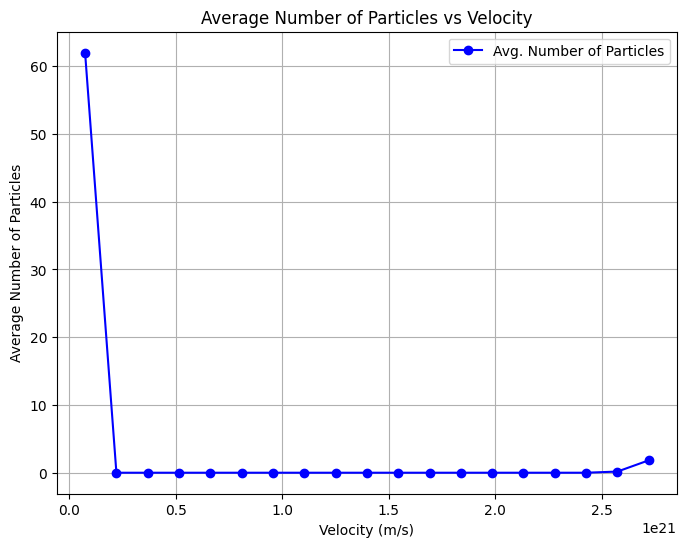

Extended simulation complete. Data saved to 'extended_verlet_simulation.xlsx'.


In [7]:
# Constants for extended simulation
additional_iterations = 1000
analysis_iterations = 200  # Last 200 iterations for analysis

# Reuse positions, velocities, and forces from previous simulation
positions = positions_history[-1]
velocities = velocities_history[-1]
forces = forces_history[-1]

# Initialize new histories
positions_history_extended = []
velocities_history_extended = []
forces_history_extended = []

for step in range(additional_iterations):
    # Verlet integration
    if step == 0:
        new_positions = positions + velocities * delta_t + 0.5 * forces / mass * delta_t**2
    else:
        new_positions = 2 * positions - old_positions + forces / mass * delta_t**2

    # Enforce maximum displacement per time step
    displacements = new_positions - positions
    displacements -= box_length * np.round(displacements / box_length)  # Periodic boundary
    displacement_magnitudes = np.linalg.norm(displacements, axis=1)
    scaling_factors = np.minimum(1, max_displacement / displacement_magnitudes)
    displacements *= scaling_factors[:, np.newaxis]
    new_positions = positions + displacements

    # Update forces and velocities
    old_positions = positions
    positions = new_positions
    forces = compute_forces(positions, box_length)
    velocities += 0.5 * (forces / mass + forces / mass) * delta_t

    # Save history
    positions_history_extended.append(positions.copy())
    velocities_history_extended.append(velocities.copy())
    forces_history_extended.append(forces.copy())

    if step % 100 == 0:
        print(f"Extended Simulation Step {step + 1}/{additional_iterations}")

# Combine original and extended histories
positions_history_full = positions_history + positions_history_extended
velocities_history_full = velocities_history + velocities_history_extended
forces_history_full = forces_history + forces_history_extended

# Analyze last 200 iterations
velocities_last_200 = velocities_history_extended[-analysis_iterations:]
velocities_magnitudes = np.linalg.norm(np.array(velocities_last_200), axis=2).flatten()

# Bin and calculate average number of particles
velocity_bins = np.linspace(0, np.max(velocities_magnitudes), 20)
particle_counts, _ = np.histogram(velocities_magnitudes, bins=velocity_bins)
avg_particle_counts = particle_counts / analysis_iterations
bin_centers = 0.5 * (velocity_bins[:-1] + velocity_bins[1:])  # Compute bin centers for line graph

# Plot average number of particles vs velocity as a line graph
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, avg_particle_counts, marker="o", linestyle="-", color="b", label="Avg. Number of Particles")
plt.xlabel("Velocity (m/s)")
plt.ylabel("Average Number of Particles")
plt.title("Average Number of Particles vs Velocity")
plt.grid()
plt.legend()
plt.show()

# Save results to Excel
df_positions_extended = pd.DataFrame({
    "Atom": np.repeat(range(1, num_atoms + 1), len(positions_history_full)),
    "Time": np.tile(np.arange(0, (num_steps + additional_iterations) * delta_t, delta_t), num_atoms),
    "X": np.concatenate([pos[:, 0] for pos in positions_history_full]),
    "Y": np.concatenate([pos[:, 1] for pos in positions_history_full]),
    "Z": np.concatenate([pos[:, 2] for pos in positions_history_full])
})

df_velocities_extended = pd.DataFrame({
    "Atom": np.repeat(range(1, num_atoms + 1), len(velocities_history_full)),
    "Time": np.tile(np.arange(0, (num_steps + additional_iterations) * delta_t, delta_t), num_atoms),
    "Vx": np.concatenate([vel[:, 0] for vel in velocities_history_full]),
    "Vy": np.concatenate([vel[:, 1] for vel in velocities_history_full]),
    "Vz": np.concatenate([vel[:, 2] for vel in velocities_history_full])
})

df_forces_extended = pd.DataFrame({
    "Atom": np.repeat(range(1, num_atoms + 1), len(forces_history_full)),
    "Time": np.tile(np.arange(0, (num_steps + additional_iterations) * delta_t, delta_t), num_atoms),
    "Fx": np.concatenate([force[:, 0] for force in forces_history_full]),
    "Fy": np.concatenate([force[:, 1] for force in forces_history_full]),
    "Fz": np.concatenate([force[:, 2] for force in forces_history_full])
})

with pd.ExcelWriter("extended_verlet_simulation.xlsx") as writer:
    df_positions_extended.to_excel(writer, sheet_name="Positions", index=False)
    df_velocities_extended.to_excel(writer, sheet_name="Velocities", index=False)
    df_forces_extended.to_excel(writer, sheet_name="Forces", index=False)

print("Extended simulation complete. Data saved to 'extended_verlet_simulation.xlsx'.")


In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.
